## <font color=#febe14>Wheel Chair detection Convolutional Neural Network Model</font>

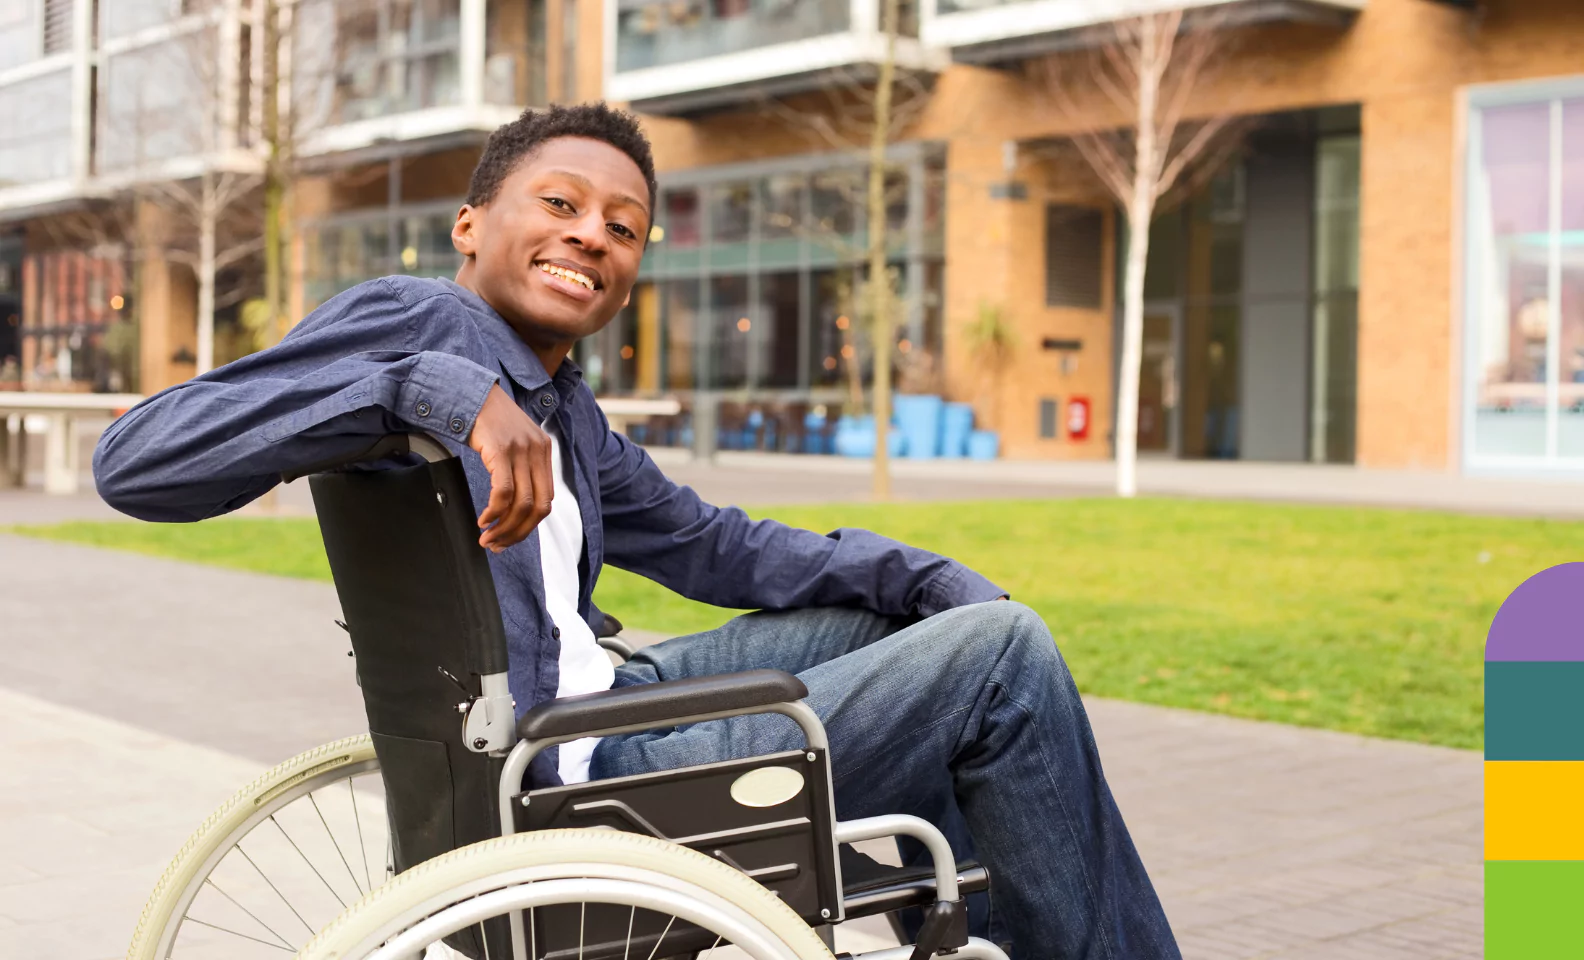

## <font color=#febe14>Question</font>
Could AI and deep learning play a role in automating some human intenstive aspects of public transit?

## <font color=#febe14>Purpose</font>
The goal of this project is to train a deep learning model on detecting wheelchairs and distinguish them from bikes. A real-life possible application is to automate the ramps on public tranist buses to only be lowered when detecting wheelchairs and for the bike-rack to be lowered when detecting a bike.

## <font color=#febe14>Data Story</font>

Finding appropriate datasets was a challenging task.

I found this dataset on Kaggle
https://www.kaggle.com/datasets/yinchuangsum/person-wheel-chair-not-wheel-chair

However, the dataset structure was something I am not familier with. The data was split into train, test, and validation segments with the labels in seperate textfiles and YAML file to create mapping between the data files and labels. This created a big challenge and a hurdle for me as I had to use many new techniques that I wasn't familier with and ultimetly it wouldn't have served the purpose of my model.

Therefore, I took the same dataset and resturctred it in a way that enables me to create an effective model with it and serve the final goal of my project.

I restructed the dataset into two classes,
- Person on a wheel chair
- not a wheel chair

Then I uploaded it to Kaggle under my account and utilized the Kaggle API to import the dataset.

https://www.kaggle.com/datasets/abdallahmaher23/wheel-chair-binary-classification

In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np
import os
from PIL import Image
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

In [2]:
#load data
#install Kaggle
! pip install -q kaggle
from google.colab import files

# choose the kaggle.json file that you downloaded
files.upload()
! mkdir ~/.kaggle
! mv kaggle.json ~/.kaggle/

# change the permissions of the file
! chmod 600 ~/.kaggle/kaggle.json

#download the kaggle dataset after uploading the Kagggle JSON token
!kaggle datasets download -d abdallahmaher23/wheel-chair-binary-classification

Saving kaggle.json to kaggle.json
 95% 25.0M/26.3M [00:00<00:00, 92.9MB/s]
100% 26.3M/26.3M [00:00<00:00, 81.4MB/s]


In [3]:
!unzip wheel-chair-binary-classification -d dataset_folder

Archive:  wheel-chair-binary-classification.zip
  inflating: dataset_folder/Binary_data/test/Person on wheel chair/106_png.rf.b37b5c79e7de9534b9c96ed0f0b985fd.jpg  
  inflating: dataset_folder/Binary_data/test/Person on wheel chair/16_png.rf.f241aa737e83934f11fda9a24d397502.jpg  
  inflating: dataset_folder/Binary_data/test/Person on wheel chair/2_png.rf.b011a204248916eff87d6ef5bc46b2c1.jpg  
  inflating: dataset_folder/Binary_data/test/Person on wheel chair/32_png.rf.86c4ad4f9fa599186346ab92cae5e6b0.jpg  
  inflating: dataset_folder/Binary_data/test/Person on wheel chair/38_png.rf.c75831c0df8c031e3517b9fa0ecd5c17.jpg  
  inflating: dataset_folder/Binary_data/test/Person on wheel chair/42_png.rf.a6416fdb44a9c09a8d8a688b7c544b64.jpg  
  inflating: dataset_folder/Binary_data/test/Person on wheel chair/47_png.rf.ac335ecacaed934d5b16b0aa739b1fb7.jpg  
  inflating: dataset_folder/Binary_data/test/Person on wheel chair/73_png.rf.48673d29c8e5e1eb3a166b9872a9556d.jpg  
  inflating: dataset_fol

In [4]:
class_names =['Person on wheel chair','not wheel chair']

In [10]:
#data augmentation on the train data for model accuracy imporovement
train_datagen = ImageDataGenerator (rescale= 1/255,
                                    shear_range = 0.2,
                                    zoom_range = 0.2,
                                    horizontal_flip= True)

validation_datagen = ImageDataGenerator(rescale = 1/255)
test_datagen = ImageDataGenerator(rescale=1/255)

train_set = train_datagen.flow_from_directory ('/content/data/train',
                                                  target_size=(64,64),
                                                  batch_size=32,
                                                  classes = class_names,
                                                  class_mode = 'binary')

validation_set = validation_datagen.flow_from_directory ('/content/data/valid',
                                                  target_size=(64,64),
                                                  batch_size=32,
                                                  classes = class_names,
                                                  class_mode = 'binary')

test_set = test_datagen.flow_from_directory('/content/data/test',
                                                  target_size=(64,64),
                                                  batch_size=32,
                                                  classes=class_names,
                                                  class_mode='binary'
)



Found 1107 images belonging to 2 classes.
Found 107 images belonging to 2 classes.
Found 52 images belonging to 2 classes.


## <font color='darkorange'>Model building</font>

In [11]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3), activation ='relu', input_shape = (64,64,3)),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(255, (1, 1), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 62, 62, 16)        448       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 31, 31, 16)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 29, 29, 32)        4640      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 6, 6, 64)        

In [13]:
opt = RMSprop (learning_rate = 0.001)
model.compile(loss ='binary_crossentropy',
              optimizer= opt,
              metrics =['accuracy'])

In [23]:
model.fit_generator(train_set,
                    epochs = 20,
                    validation_data = validation_set,

                    validation_steps = 150)

<ipython-input-23-0414fbeff140>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_set,


Epoch 1/20
35/35 [==============================] - ETA: 0s - loss: 0.1147 - accuracy: 0.9575

35/35 [==============================] - 8s 225ms/step - loss: 0.1147 - accuracy: 0.9575 - val_loss: 0.4410 - val_accuracy: 0.8879
Epoch 2/20
35/35 [==============================] - 8s 221ms/step - loss: 0.1014 - accuracy: 0.9675
Epoch 3/20
35/35 [==============================] - 8s 220ms/step - loss: 0.0968 - accuracy: 0.9566
Epoch 4/20
35/35 [==============================] - 7s 188ms/step - loss: 0.0983 - accuracy: 0.9702
Epoch 5/20
35/35 [==============================] - 7s 184ms/step - loss: 0.0804 - accuracy: 0.9702
Epoch 6/20
35/35 [==============================] - 8s 220ms/step - loss: 0.1315 - accuracy: 0.9702
Epoch 7/20
35/35 [==============================] - 6s 182ms/step - loss: 0.0392 - accuracy: 0.9828
Epoch 8/20
35/35 [==============================] - 8s 207ms/step - loss: 0.0713 - accuracy: 0.9747
Epoch 9/20
35/35 [==============================] - 8s 225ms/step - loss: 0.0772 - accuracy: 0.9774
Epoch 10/20
35/35 [==============================] - 6s 182ms/step - 

## <font color='darkorange'>Model testing</font>

In [37]:
test_image = image.load_img(r'/content/data/test/Person on wheel chair/16_png.rf.f241aa737e83934f11fda9a24d397502.jpg', target_size = (64,64))
test_image = np.expand_dims(test_image, axis = 0)

In [38]:
result = model.predict (test_image)

1/1 [==============================] - 0s 28ms/step


In [39]:
predicted_class = class_names[int(result[0][0])]

In [41]:
print(f"The predicted class is: {predicted_class}")


The predicted class is: Person on wheel chair


## <font color='darkorange'>Gradio Deployment & Interface</font>

For the purpose of the presentability and usbility, here I'm attempting to integrate my model with Gradio to provide and interface of the model for testing. I had many challenges in this process one of which creating a bridge for gradio to access the model and run the predictions

In [19]:
#install gradio
pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 50.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 7.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.4/297.4 kB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.3/140.3 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 12.2 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of mdit-py-plugins to determine which version is compatible with other requirements. This could take a while.
  

In [20]:
import gradio as gr

In [21]:
def img_predict (input_img):

  user_img = input_img()

  resized_img = tf.image,resize(user_img,(64,64))
  resized_img = np.expand_dims (resized_img, axis = 0)
  prediction = model.predict(resized_img)[0][0]
  predicted_class =class_names [0] if prediction>0.5 else class_names [1]

  return user_img, predicted_class, prediction

demo = gr.Interface(fn= img_predict, inputs = gr.inputs.Image(shape=(200, 200)),
                    outputs = ['image', 'text', 'number'])
demo.launch(share = True)


<ipython-input-21-2a8f731f9050>:12: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  demo = gr.Interface(fn= img_predict, inputs = gr.inputs.Image(shape=(200, 200)),
<ipython-input-21-2a8f731f9050>:12: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  demo = gr.Interface(fn= img_predict, inputs = gr.inputs.Image(shape=(200, 200)),


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://d8a427293513b3da6b.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
